<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Deep-Learning-Projects/blob/main/MNIST%20Digit%20Classifier/MNIST_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
X_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


## Check a Sample

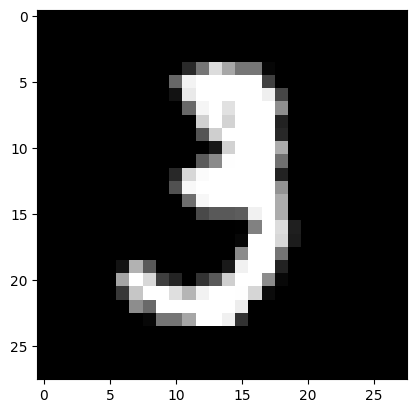

In [3]:
plt.imshow(X_train[10], cmap='gray')
plt.show()

# Preprocessing

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

X_train Shape: (60000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)


# Model Definition
## LeNet5

The leNet-5 network consists of seven layers:
* Two convolutional layers
* Two pooling layers
* Three fully connected layers
________________________________________________________________
Here's the breakdown of LeNet5 architecture:

1. **C1 - First Convolutional Layer**:
   - 6 filters (kernels), each of size 5x5, with stride 1.
   - This results in 6 feature maps, each with dimensions 28x28 (for a 32x32 input image).

2. **S2 - First Subsampling (Average Pooling) Layer**:
   - 2x2 pooling with a stride of 2, which reduces the feature maps to 14x14.

3. **C3 - Second Convolutional Layer**:
   - 16 filters of size 5x5.
   - The result is 16 feature maps with dimensions 10x10 (after applying the convolution operation to 14x14 input from the previous layer).

4. **S4 - Second Subsampling (Average Pooling) Layer**:
   - 2x2 pooling with stride 2, reducing the feature maps to 5x5.

5. **C5 - Fully Connected Layer** (referred to as a convolutional layer in the original paper, but it’s fully connected to the input):
   - This layer has 120 neurons, connected to the 5x5 feature maps from the previous layer.

6. **F6 - Fully Connected Layer**:
   - 84 neurons.

7. **Output Layer**:
   - A fully connected softmax layer with 10 neurons (for classifying digits 0-9).

In [7]:
# Defining Model
model = tf.keras.Sequential()

# Add Layers
# C1 Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=6,
                                strides=(1,1),
                                kernel_size=(5,5),
                                activation='tanh',
                                input_shape=(28, 28, 1)))

# S2 SubSampling Layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                            strides=(2,2)))

# C3 Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=16,
                                strides=(1,1),
                                kernel_size=(5,5),
                                activation='tanh'))

# S4 SubSampling Layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                            strides=(2,2)))

# Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model.add(tf.keras.layers.Flatten())

# C5
model.add(tf.keras.layers.Dense(128,
                               activation='tanh'))

# F6 Fully Connected Layer
model.add(tf.keras.layers.Dense(84,
                                activation='tanh'))

# Output Layer
model.add(tf.keras.layers.Dense(10,
                                activation='softmax'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, decay=0.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,154 (184.20 KB)

 Trainable params: 47,154 (184.20 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# We will be allowing 10 itterations to happen
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7943 - loss: 0.7308 - val_accuracy: 0.9410 - val_loss: 0.1982
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9442 - loss: 0.1886 - val_accuracy: 0.9636 - val_loss: 0.1200
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9636 - loss: 0.1204 - val_accuracy: 0.9739 - val_loss: 0.0924
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9732 - loss: 0.0887 - val_accuracy: 0.9790 - val_loss: 0.0709
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0759 - val_accuracy: 0.9805 - val_loss: 0.0623
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0597 - val_accuracy: 0.9832 - val_loss: 0.0546
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0531 - val_accuracy: 0.9819 - val_loss: 0.0535
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9858 - loss: 0.0473 - val_accuracy:

# LeNet5 Performance

In [11]:
# Check Accuracy of the Model
loss ,acc= model.evaluate(X_test, y_test)
print('Accuracy : ', acc)
print('Loss: ', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0477
Accuracy :  0.9861999750137329
Loss:  0.04150601848959923


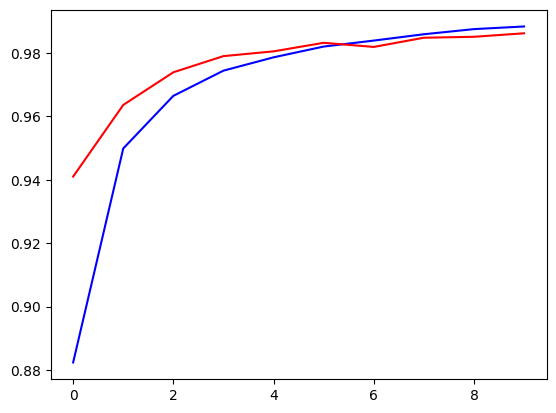

In [12]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')

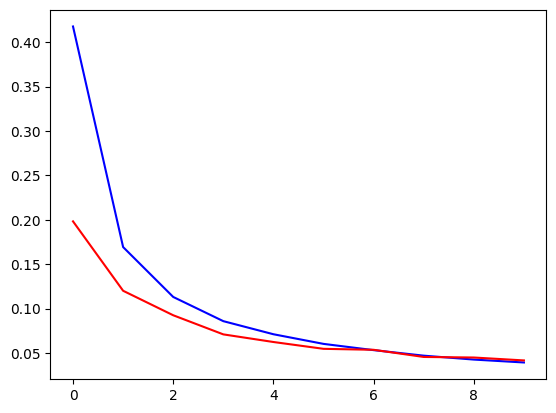

In [13]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')

In [ ]:
!pip install visualkeras

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


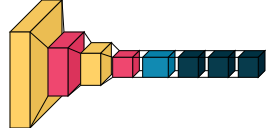

In [15]:
import visualkeras
visualkeras.layered_view(model)